<a href="https://colab.research.google.com/github/raz0208/Agritech-Pest-Prediction/blob/main/Agritech_Pest_Prediction_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agritech Pest Prediction and Classification

### Preprocessed Dataset Overview:
- Total Rows: 153
- Total Columns: 15
- Data Types:
  - 3 Object (String) Columns: `Date`, `Time`, `Location`
  - 11 Float Columns: `Number of Insects`, `New Catches`, `Average Temperature`, `Temp_low`, `Temp_high`, `Average Humidity`, `Day Avg_temp`, `Day Min_temp`, `Day Max_temp`, `Day Avg_Humidity`, and `Temp_change`
  - 1 Integer Column: `Event`, Binary indicator (0 or 1), representing an event occurrence.

### Column Breakdown:
1. Date & Time: Represent the timestamp of each record.
2. Number of Insects & New Catches: Key target variables for regression and classification.
3. Event: Binary indicator, possibly for significant occurrences.
4. Location: Specifies data collection sites (Cicalino1, etc.).
5. Temperature & Humidity Variables:
  - Includes averages, daily minimum/maximum, and changes.
6. Temp_change: Measures temperature variation.

### Observations:
- No missing values.
- The dataset is structured with meteorological and pest count variables, ideal for predictive modeling.

### Import required libraries and read the data

In [53]:
# Import required libraries
import os
import pandas as pd
import numpy as np

## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Read data
Final_Agritech_Pest_DS = pd.read_csv('/content/Final_Merged_Dataset_Cleaned.csv')

# Showing first rows of preprocessed Agritech Pest dataset
print(Final_Agritech_Pest_DS.head())

         Date      Time  Number of Insects  New Catches  Event   Location  \
0  2024-07-06  06:01:00                0.0          0.0      0  Cicalino1   
1  2024-07-07  06:04:00                0.0          0.0      0  Cicalino1   
2  2024-07-08  06:03:00                0.0          0.0      0  Cicalino1   
3  2024-07-09  06:05:00                0.0          0.0      1  Cicalino1   
4  2024-07-10  06:03:00                0.0          0.0      0  Cicalino1   

   Average Temperature  Temp_low  Temp_high  Average Humidity  Day Avg_temp  \
0                13.91      13.6       14.4             97.65         22.34   
1                20.78      20.1       21.2             83.49         23.52   
2                19.03      18.7       19.5             96.87         25.67   
3                15.33      15.0       15.7             82.29         25.87   
4                15.48      15.0       16.0             87.12         26.41   

   Day Min_temp  Day Max_temp  Day Avg_Humidity  Temp_change  

In [55]:
# Summary of dataset
Final_Agritech_Pest_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 153 non-null    object 
 1   Time                 153 non-null    object 
 2   Number of Insects    153 non-null    float64
 3   New Catches          153 non-null    float64
 4   Event                153 non-null    int64  
 5   Location             153 non-null    object 
 6   Average Temperature  153 non-null    float64
 7   Temp_low             153 non-null    float64
 8   Temp_high            153 non-null    float64
 9   Average Humidity     153 non-null    float64
 10  Day Avg_temp         153 non-null    float64
 11  Day Min_temp         153 non-null    float64
 12  Day Max_temp         153 non-null    float64
 13  Day Avg_Humidity     153 non-null    float64
 14  Temp_change          153 non-null    float64
dtypes: float64(11), int64(1), object(3)
memo

In [56]:
# Summary of dataset
print(Final_Agritech_Pest_DS.describe())

       Number of Insects  New Catches       Event  Average Temperature  \
count         153.000000   153.000000  153.000000           153.000000   
mean            0.392157     0.169935    0.163399            20.569641   
std             0.844762     0.497240    0.370943             2.855747   
min             0.000000     0.000000    0.000000            13.910000   
25%             0.000000     0.000000    0.000000            18.490000   
50%             0.000000     0.000000    0.000000            20.280000   
75%             0.000000     0.000000    0.000000            22.450000   
max             5.000000     4.000000    1.000000            27.000000   

         Temp_low   Temp_high  Average Humidity  Day Avg_temp  Day Min_temp  \
count  153.000000  153.000000        153.000000    153.000000    153.000000   
mean    20.224183   20.977451         82.332582     27.029020     18.768301   
std      2.787006    2.934341         10.905657      2.160891      1.998641   
min     13.600000

In [57]:
# Check for missing values
print(Final_Agritech_Pest_DS.isnull().sum())

Date                   0
Time                   0
Number of Insects      0
New Catches            0
Event                  0
Location               0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Day Avg_temp           0
Day Min_temp           0
Day Max_temp           0
Day Avg_Humidity       0
Temp_change            0
dtype: int64


## Feature Extracting

In [58]:
# Copy dataset in a dataframe
df = Final_Agritech_Pest_DS.copy()

# Convert "Date" to datetime format and extract useful time-based features
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday  # Monday=0, Sunday=6

# Convert "Time" to datetime format and extract hour and minute
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time

# Create lag features (previous days' insect counts)
df = df.sort_values(by=["Location", "Date"])  # Ensure sorting for lag features
df["Lag_1"] = df.groupby("Location")["Number of Insects"].shift(1)
df["Lag_2"] = df.groupby("Location")["Number of Insects"].shift(2)
df["Lag_3"] = df.groupby("Location")["Number of Insects"].shift(3)

# Fill missing values in lag features with 0 (assuming no prior data)
df[["Lag_1", "Lag_2", "Lag_3"]] = df[["Lag_1", "Lag_2", "Lag_3"]].fillna(0)

# Display the updated dataset with new features
print(df)

          Date      Time  Number of Insects  New Catches  Event   Location  \
0   2024-07-06  06:01:00                0.0          0.0      0  Cicalino1   
1   2024-07-07  06:04:00                0.0          0.0      0  Cicalino1   
2   2024-07-08  06:03:00                0.0          0.0      0  Cicalino1   
3   2024-07-09  06:05:00                0.0          0.0      1  Cicalino1   
4   2024-07-10  06:03:00                0.0          0.0      0  Cicalino1   
..         ...       ...                ...          ...    ...        ...   
148 2024-08-19  00:00:00                0.0          0.0      0     Imola3   
149 2024-08-20  00:02:00                1.0          1.0      0     Imola3   
150 2024-08-21  00:04:00                1.0          0.0      0     Imola3   
151 2024-08-22  00:00:00                2.0          1.0      0     Imola3   
152 2024-08-23  00:02:00                3.0          1.0      0     Imola3   

     Average Temperature  Temp_low  Temp_high  Average Humidity

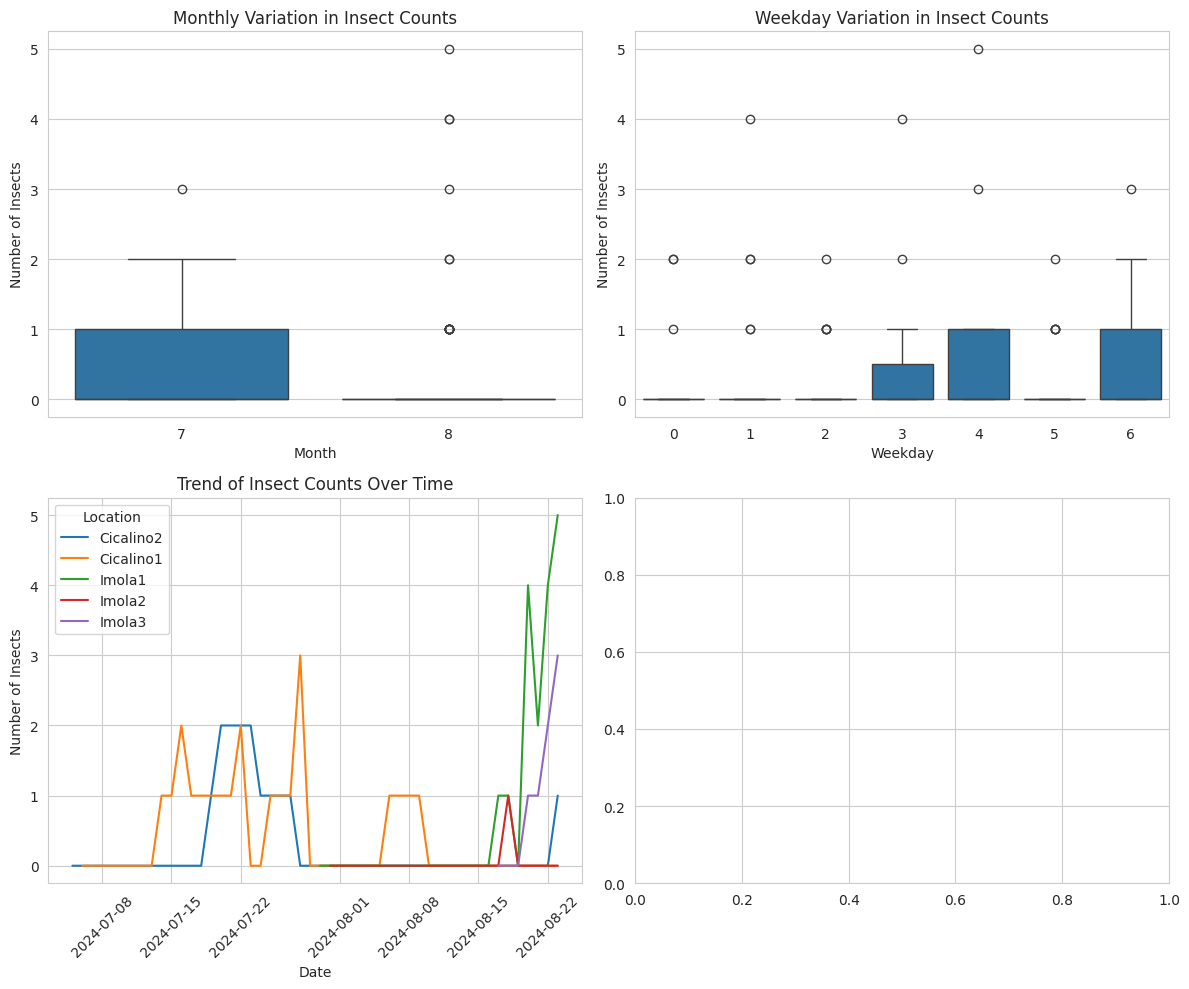

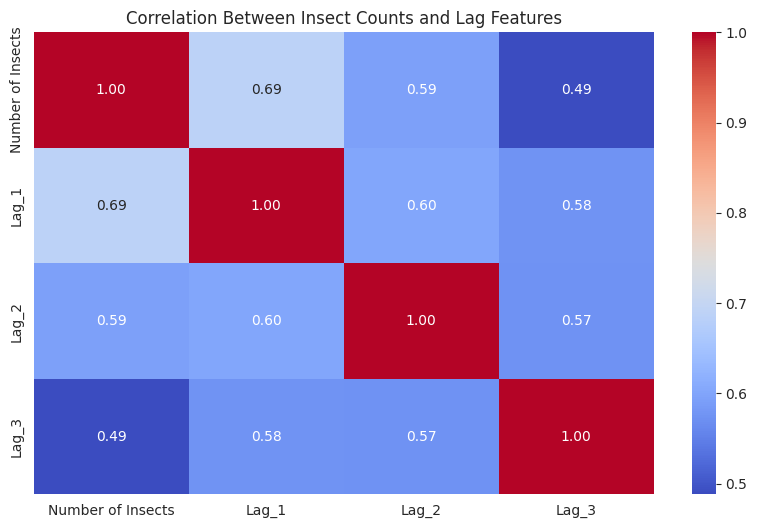

In [59]:
# Set plot style
sns.set_style("whitegrid")

# --- Time-Based Features Visualization ---

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Insect counts by month
sns.boxplot(x="Month", y="Number of Insects", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Monthly Variation in Insect Counts")

# Insect counts by weekday
sns.boxplot(x="Weekday", y="Number of Insects", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Weekday Variation in Insect Counts")

# Insect counts over time
df_sorted = df.sort_values(by=["Date"])
sns.lineplot(x="Date", y="Number of Insects", hue="Location", data=df_sorted, ax=axes[1, 0])
axes[1, 0].set_title("Trend of Insect Counts Over Time")
axes[1, 0].tick_params(axis='x', rotation=45)

# Insect counts by year (if applicable)
if df["Year"].nunique() > 1:
    sns.boxplot(x="Year", y="Number of Insects", data=df, ax=axes[1, 1])
    axes[1, 1].set_title("Yearly Variation in Insect Counts")

plt.tight_layout()
plt.show()

print("\n")
# --- Lag Features Visualization ---

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[["Number of Insects", "Lag_1", "Lag_2", "Lag_3"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Between Insect Counts and Lag Features")

plt.show()

## Model Implementation: Regression Problem
- Linear Regression, Ridge Regression, and Lasso Regression.
- Decision Tree, Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost regressors.
- Support Vector Regression (SVR) and K-Nearest Neighbors (KNN) Regression.

In [60]:
!pip install catboost

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression, Ridge Regression, and Lasso Regression

In [62]:
# Features and Target Variable
X = df.drop(columns=["Number of Insects", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["Number of Insects"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Default alpha = 1.0 (can be tuned)
lasso_reg = Lasso(alpha=0.1)  # Default alpha = 0.1 (can be tuned)

# Train models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}\n")
    return mae, mse, r2

# Evaluate all models
results = {}
results["Linear Regression"] = evaluate_model(y_test, y_pred_lin, "Linear Regression")
results["Ridge Regression"] = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
results["Lasso Regression"] = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression Results:
MAE: 0.2112, MSE: 0.1106, R²: 0.6980

Ridge Regression Results:
MAE: 0.2073, MSE: 0.1061, R²: 0.7104

Lasso Regression Results:
MAE: 0.2169, MSE: 0.1077, R²: 0.7060



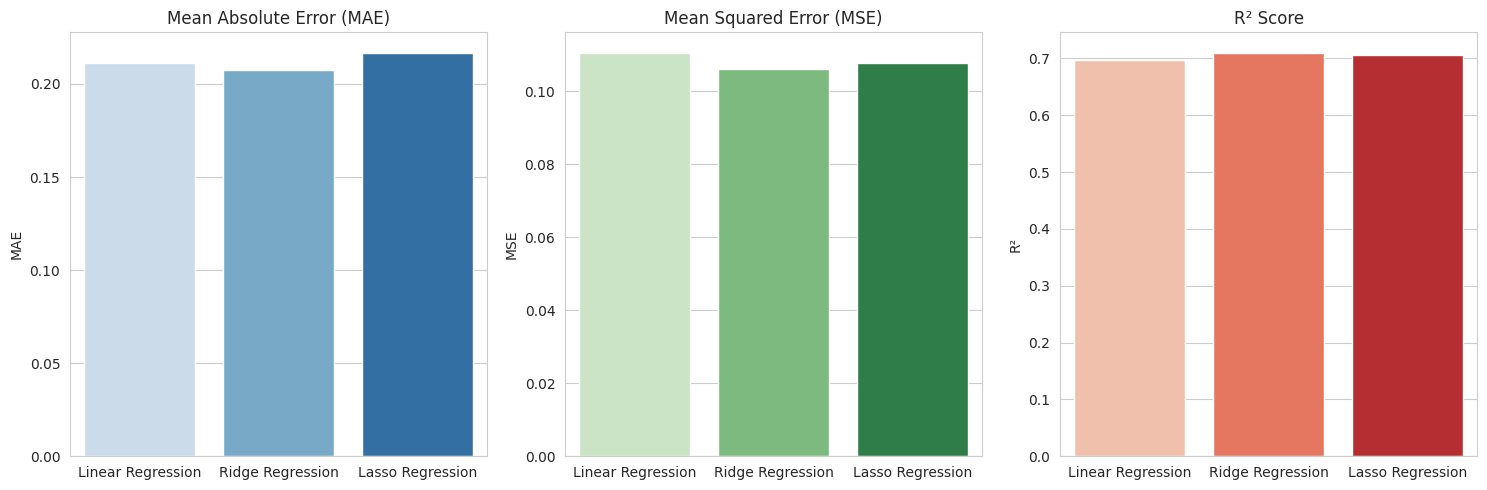

In [63]:
# Visualization of Model Performance
models = list(results.keys())
mae_values = [results[m][0] for m in models]
mse_values = [results[m][1] for m in models]
r2_values = [results[m][2] for m in models]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=models, y=mae_values, ax=axes[0], palette="Blues", hue=models, legend=False)
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")

sns.barplot(x=models, y=mse_values, ax=axes[1], palette="Greens", hue=models, legend=False)
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")

sns.barplot(x=models, y=r2_values, ax=axes[2], palette="Reds", hue=models, legend=False)
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")

plt.tight_layout()
plt.show()

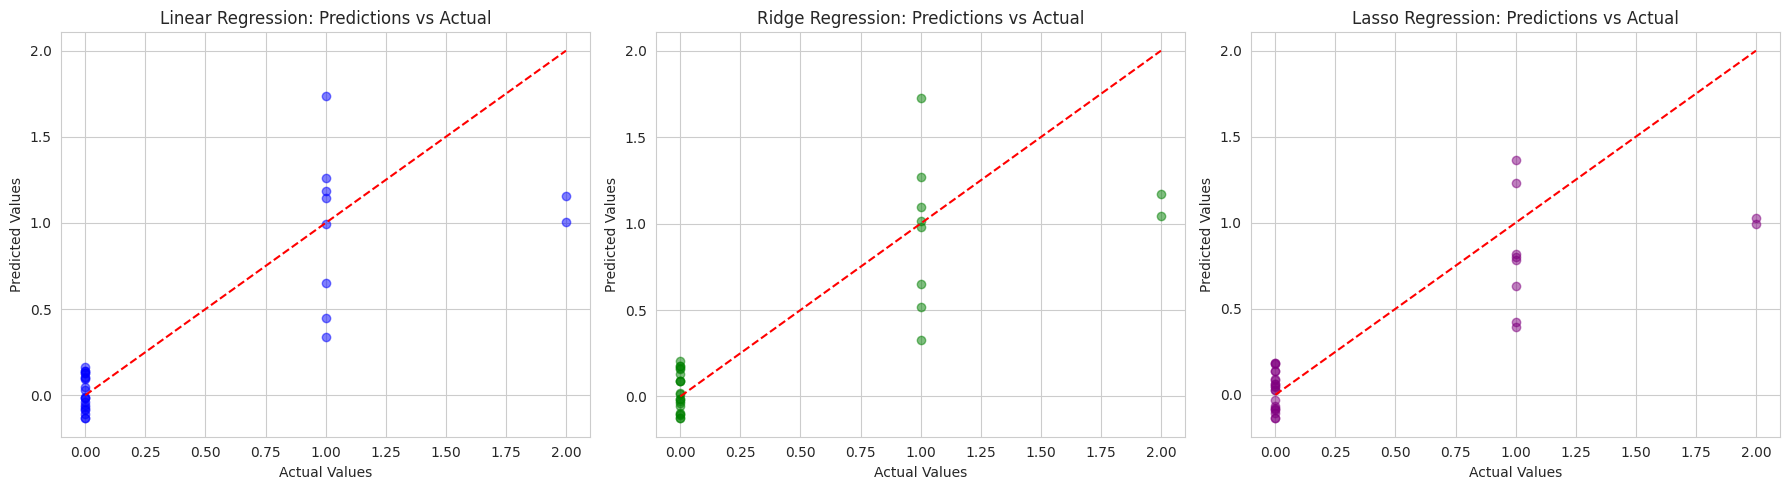

In [64]:
# Visualization of Predictions vs Actual
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
ax[0].set_title("Linear Regression: Predictions vs Actual")
ax[0].set_xlabel("Actual Values")
ax[0].set_ylabel("Predicted Values")

ax[1].scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
ax[1].set_title("Ridge Regression: Predictions vs Actual")
ax[1].set_xlabel("Actual Values")
ax[1].set_ylabel("Predicted Values")

ax[2].scatter(y_test, y_pred_lasso, alpha=0.5, color='purple')
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
ax[2].set_title("Lasso Regression: Predictions vs Actual")
ax[2].set_xlabel("Actual Values")
ax[2].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

### Decision Tree, Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost regressors

In [65]:
# Load the dataset (assuming 'df' is already preprocessed)
X = df.drop(columns=["Number of Insects", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["Number of Insects"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
lgb_reg = LGBMRegressor(n_estimators=100, random_state=42)
cat_reg = CatBoostRegressor(n_estimators=100, verbose=0, random_state=42)

models = {
    "Decision Tree": dt_reg,
    "Random Forest": rf_reg,
    "Gradient Boosting": gb_reg,
    "XGBoost": xgb_reg,
    "LightGBM": lgb_reg,
    "CatBoost": cat_reg
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mae, mse, r2)
    print(f"{name} Results:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}\n")

Decision Tree Results:
MAE: 0.2258, MSE: 0.4194, R²: -0.1449

Random Forest Results:
MAE: 0.2355, MSE: 0.2275, R²: 0.3789

Gradient Boosting Results:
MAE: 0.2749, MSE: 0.3562, R²: 0.0274

XGBoost Results:
MAE: 0.1889, MSE: 0.1807, R²: 0.5066

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 122, number of used features: 16
[LightGBM] [Info] Start training from score 0.393443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

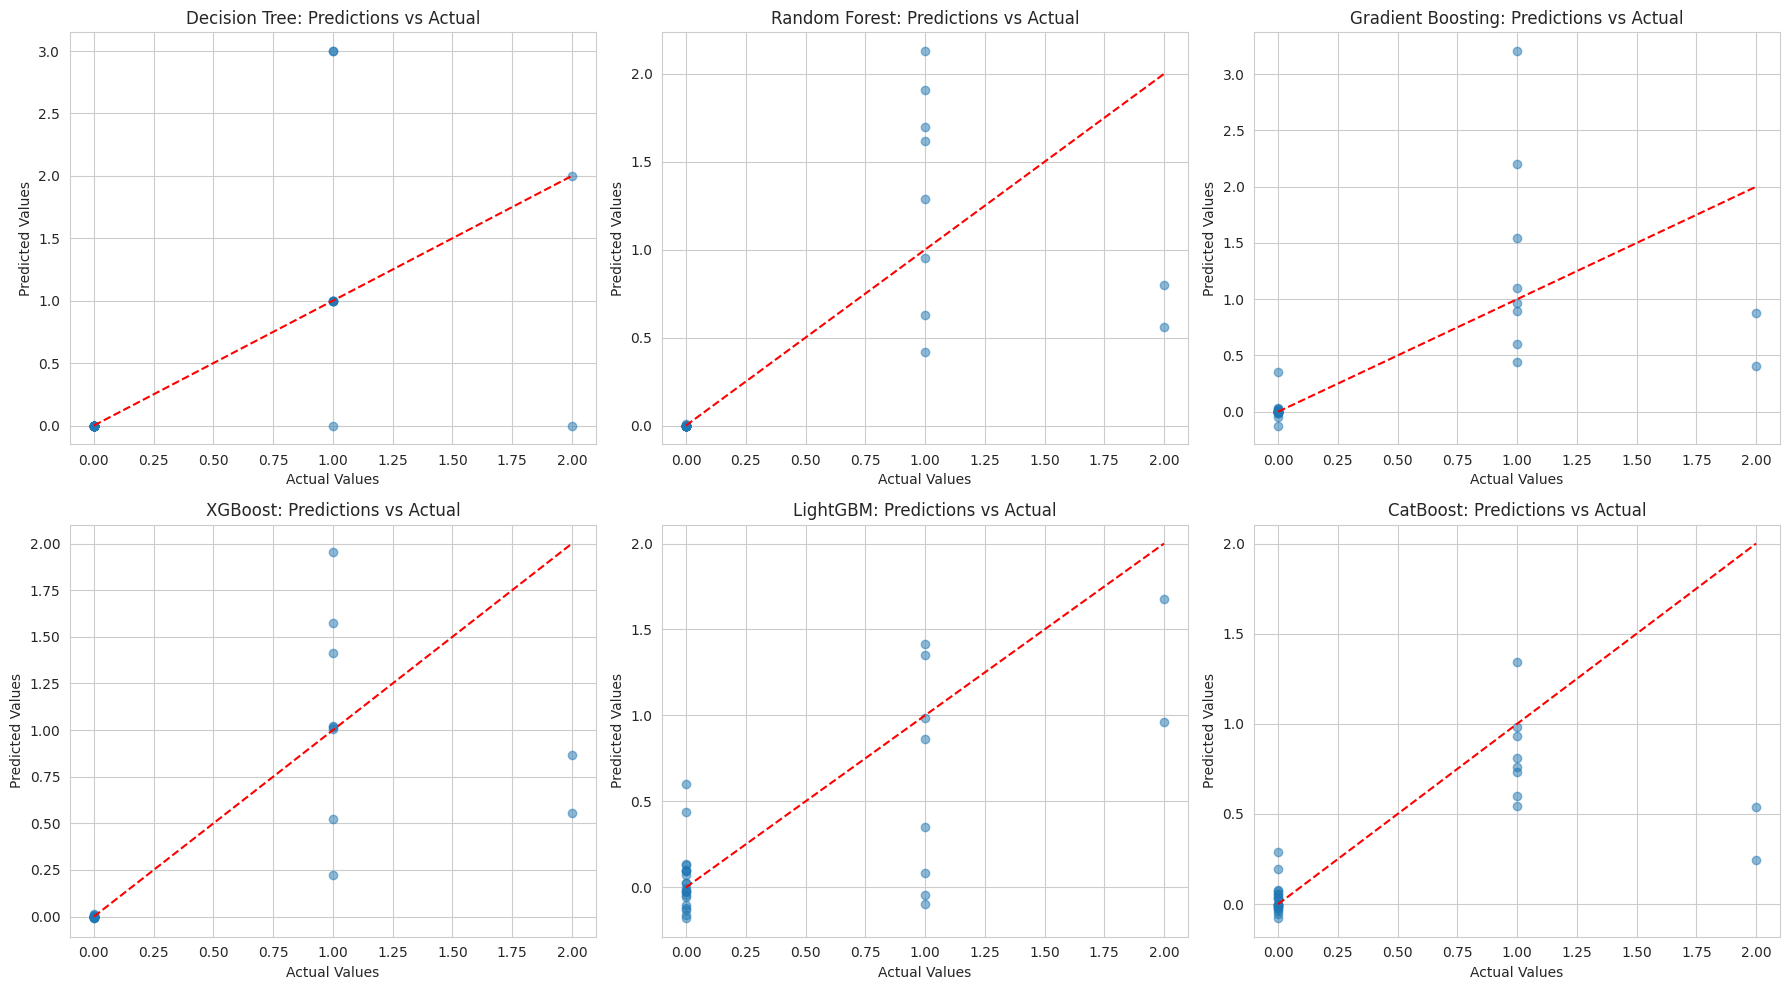

In [66]:
# Visualization of Predictions vs Actual
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    axes[i].set_title(f"{name}: Predictions vs Actual")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

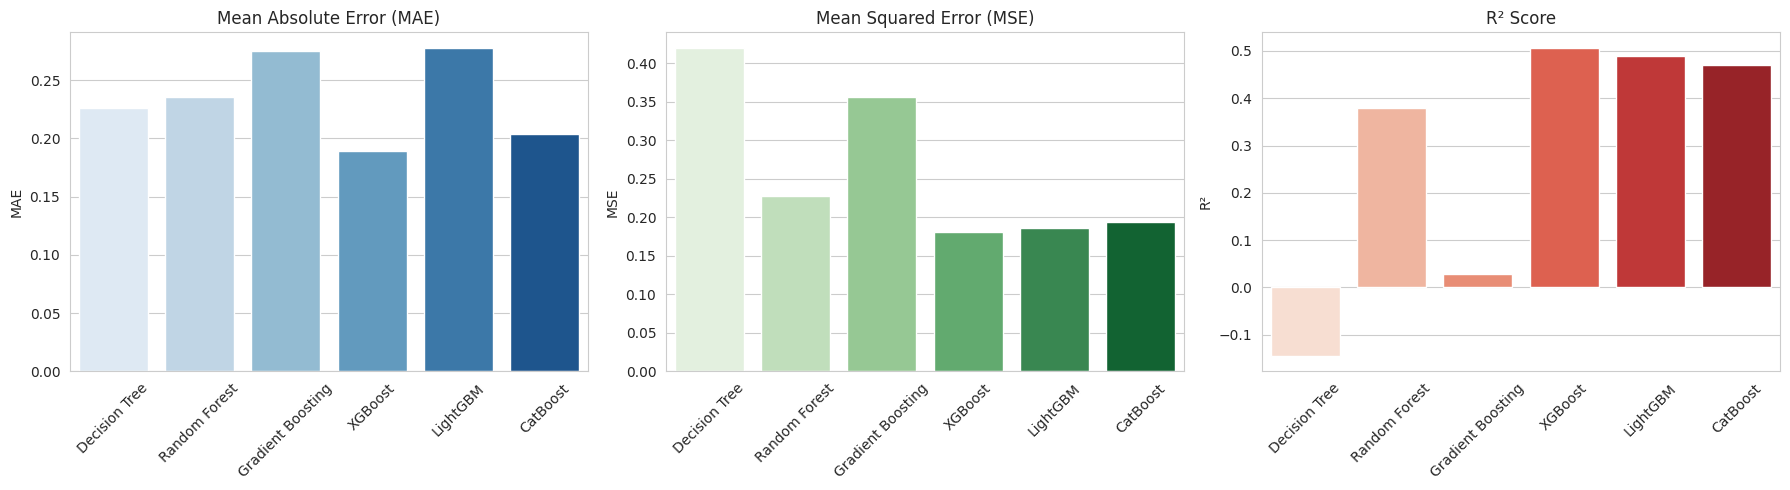

In [67]:
# Visualization of Model Performance
models_list = list(results.keys())
mae_values = [results[m][0] for m in models_list]
mse_values = [results[m][1] for m in models_list]
r2_values = [results[m][2] for m in models_list]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=models_list, y=mae_values, ax=axes[0], hue=models_list, legend=False, palette="Blues")
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=mse_values, ax=axes[1], hue=models_list, legend=False, palette="Greens")
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=r2_values, ax=axes[2], hue=models_list, legend=False, palette="Reds")
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Support Vector Regression (SVR) and K-Nearest Neighbors (KNN) Regression

In [68]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the dataset (assuming 'df' is already preprocessed)
X = df.drop(columns=["Number of Insects", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["Number of Insects"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1)
knn_reg = KNeighborsRegressor(n_neighbors=5)

models = {
    "Support Vector Regression": svr_reg,
    "K-Nearest Neighbors": knn_reg
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mae, mse, r2)
    print(f"{name} Results:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}\n")

Support Vector Regression Results:
MAE: 0.2662, MSE: 0.1579, R²: 0.5688

K-Nearest Neighbors Results:
MAE: 0.2710, MSE: 0.2348, R²: 0.3589



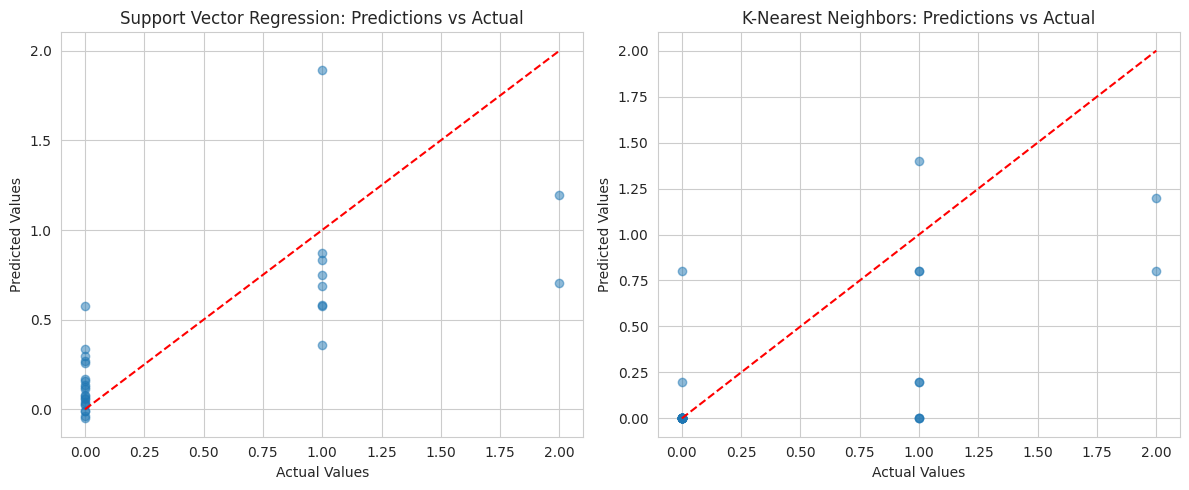

In [70]:
# Visualization of Predictions vs Actual
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    axes[i].set_title(f"{name}: Predictions vs Actual")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

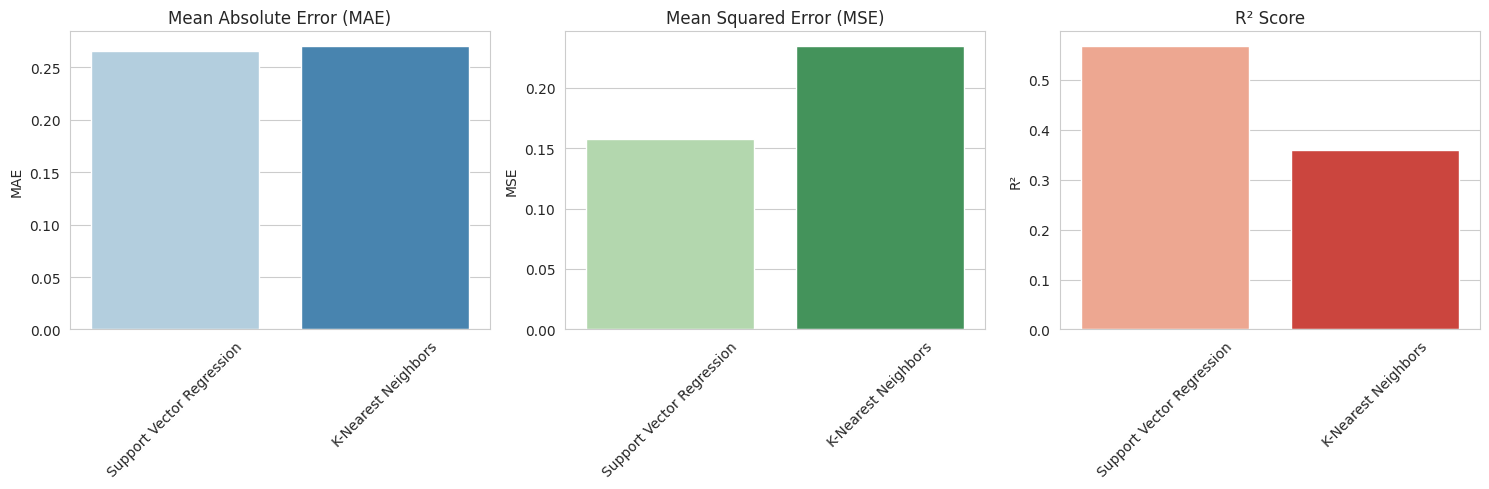

In [71]:
# Visualization of Model Performance
models_list = list(results.keys())
mae_values = [results[m][0] for m in models_list]
mse_values = [results[m][1] for m in models_list]
r2_values = [results[m][2] for m in models_list]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=models_list, y=mae_values, ax=axes[0], hue=models_list, legend=False, palette="Blues")
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=mse_values, ax=axes[1], hue=models_list, legend=False, palette="Greens")
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=r2_values, ax=axes[2], hue=models_list, legend=False, palette="Reds")
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Model implementation: Classification Problem

In [72]:
# import rewuired libraries for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression and Decision Tree classification

In [73]:
# Load the dataset
X = df.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["New Catches"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_clf
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled if name == "Logistic Regression" else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name == "Logistic Regression" else X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.50      0.40      0.44         5

    accuracy                           0.84        31
   macro avg       0.69      0.66      0.68        31
weighted avg       0.83      0.84      0.83        31

Decision Tree Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.50      0.40      0.44         5

    accuracy                           0.84        31
   macro avg       0.69      0.66      0.68        31
weighted avg       0.83      0.84      0.83        31



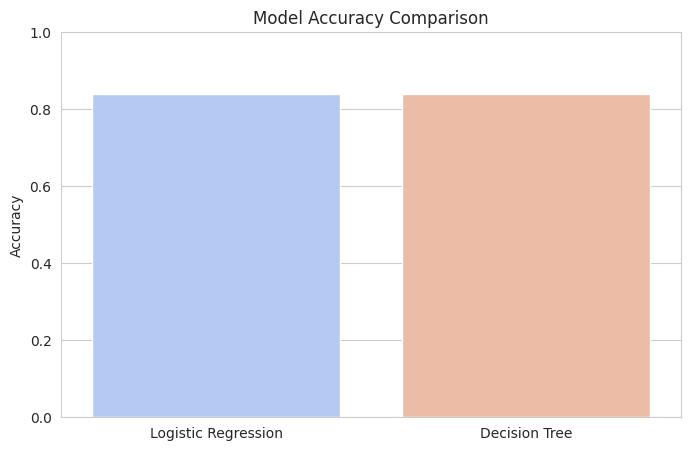

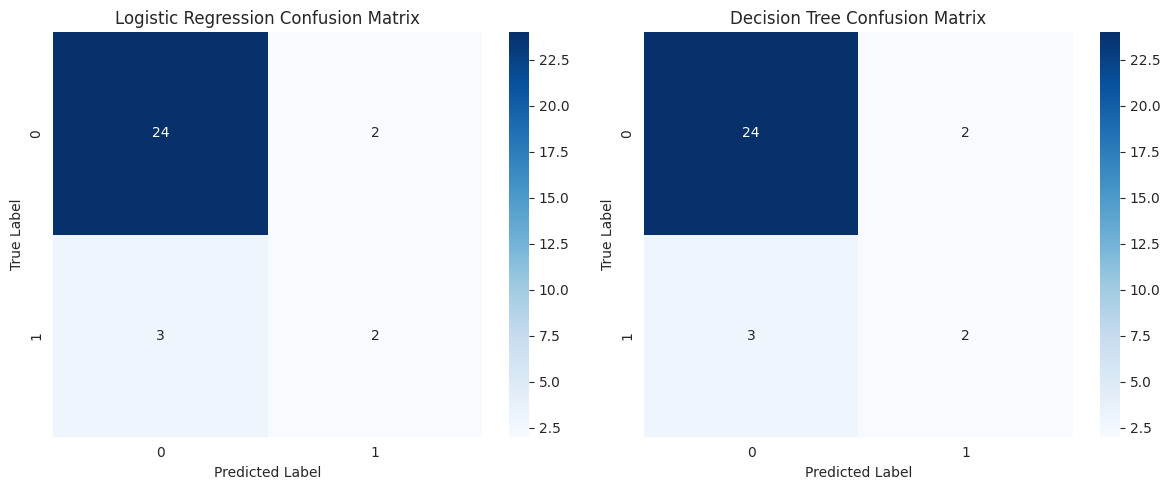

In [74]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False, hue=models.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print("\n")
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Random Forest and Gradient Boosting classifiers, including XGBoost, LightGBM, and CatBoost

In [75]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [76]:
# Load the dataset (assuming 'df' is already preprocessed)
X = df.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["New Catches"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
# xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
# lgb_clf = LGBMClassifier(n_estimators=100, random_state=42)
# cat_clf = CatBoostClassifier(n_estimators=100, verbose=0, random_state=42)

models = {
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    # "XGBoost": xgb_clf,
    # "LightGBM": lgb_clf,
    # "CatBoost": cat_clf
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7742
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg       0.41      0.46      0.44        31
weighted avg       0.69      0.77      0.73        31

Gradient Boosting Accuracy: 0.9032
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        26
         1.0       0.67      0.80      0.73         5

    accuracy                           0.90        31
   macro avg       0.81      0.86      0.83        31
weighted avg       0.91      0.90      0.91        31



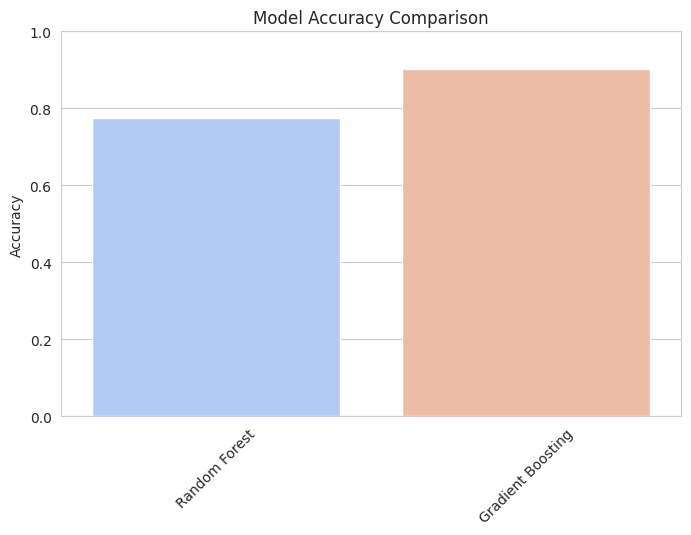

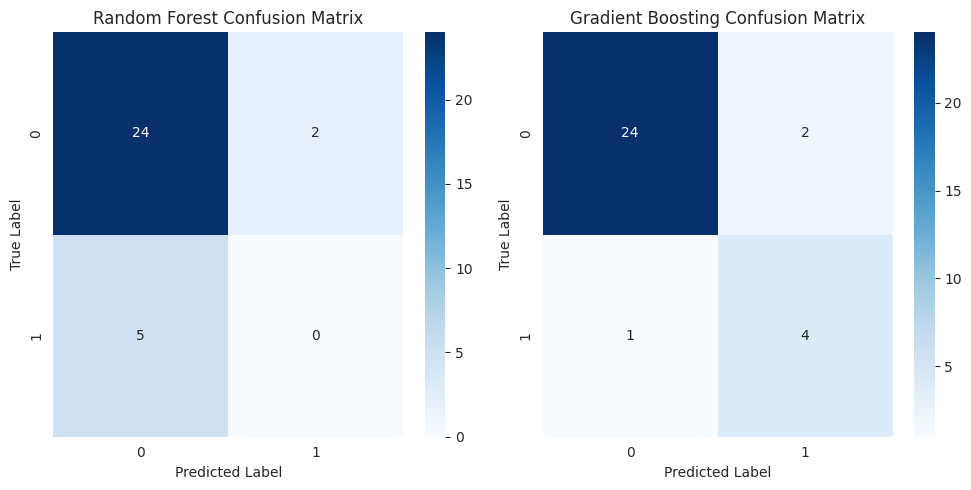

In [77]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False, hue=models.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\n")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Neural Networks (MLP Classifier)

In [78]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [79]:
# Load the dataset (assuming 'df' is already preprocessed)
X = df.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["New Catches"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svm_clf = SVC(kernel='rbf', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

models = {
    "Support Vector Machine": svm_clf,
    "K-Nearest Neighbors": knn_clf,
    "Neural Network (MLP)": mlp_clf
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled if name in ["Support Vector Machine", "Neural Network (MLP)"] else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name in ["Support Vector Machine", "Neural Network (MLP)"] else X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Support Vector Machine Accuracy: 0.7742
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg       0.41      0.46      0.44        31
weighted avg       0.69      0.77      0.73        31

K-Nearest Neighbors Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        26
         1.0       0.50      0.20      0.29         5

    accuracy                           0.84        31
   macro avg       0.68      0.58      0.60        31
weighted avg       0.80      0.84      0.81        31

Neural Network (MLP) Accuracy: 0.7742
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg 

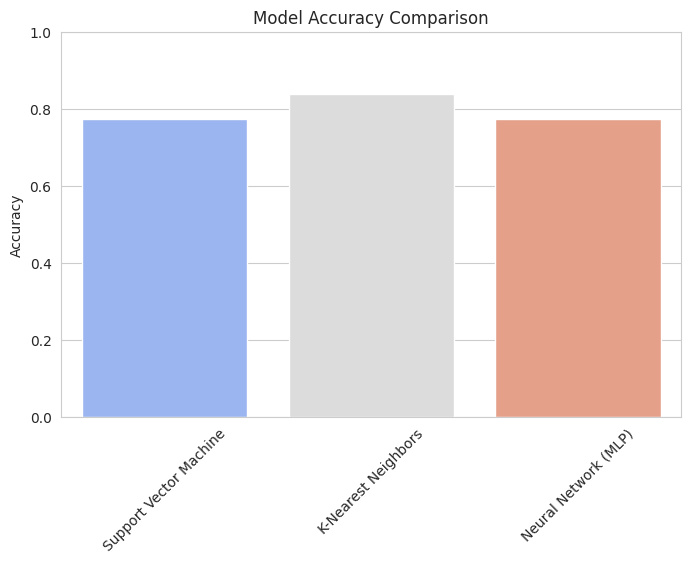

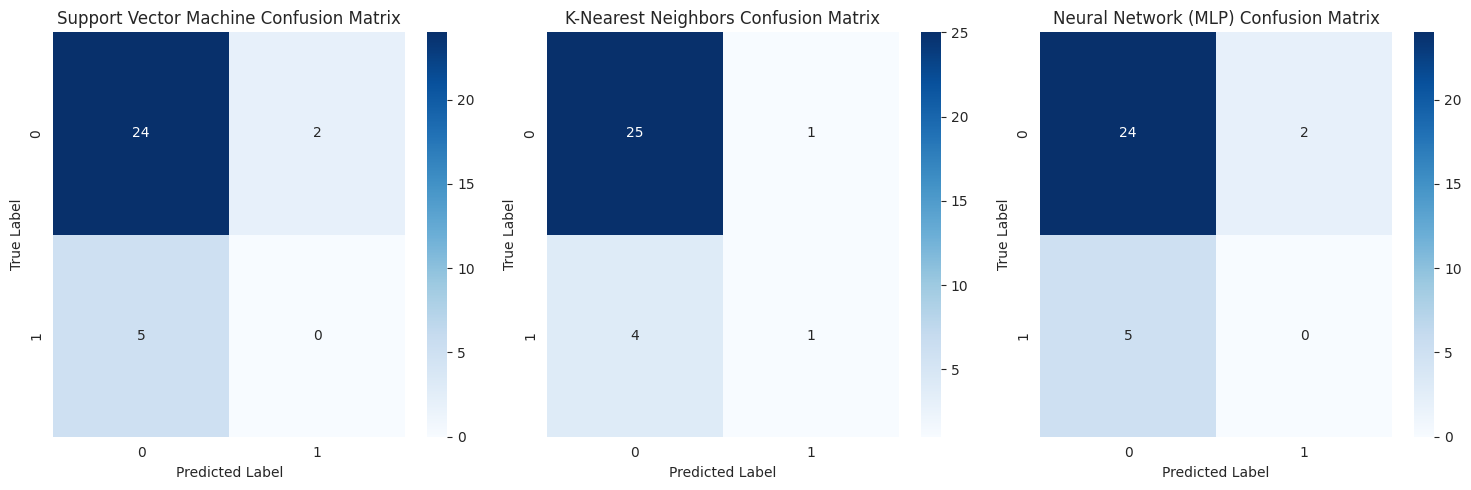

In [80]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False, hue=models.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\n")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

## Model Impelementaion: Time Series Forcasting

In [84]:
# Required libararies for Time Series Forcasting models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

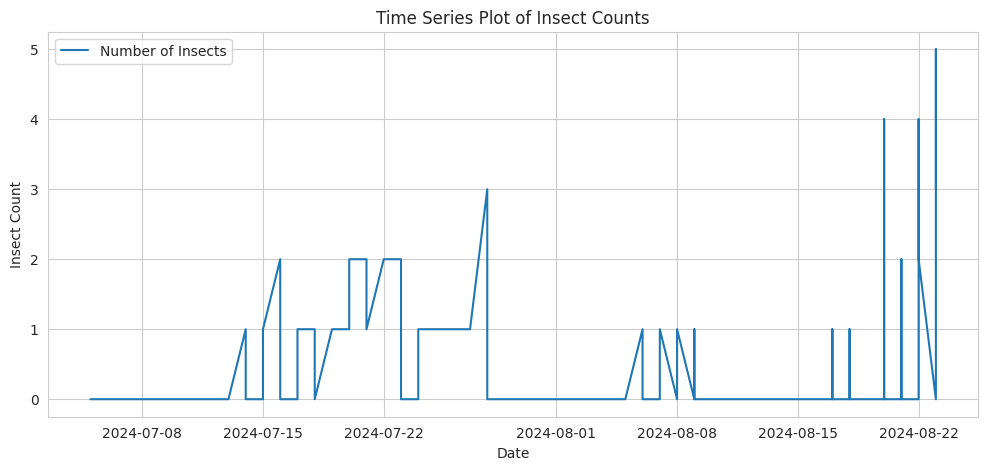

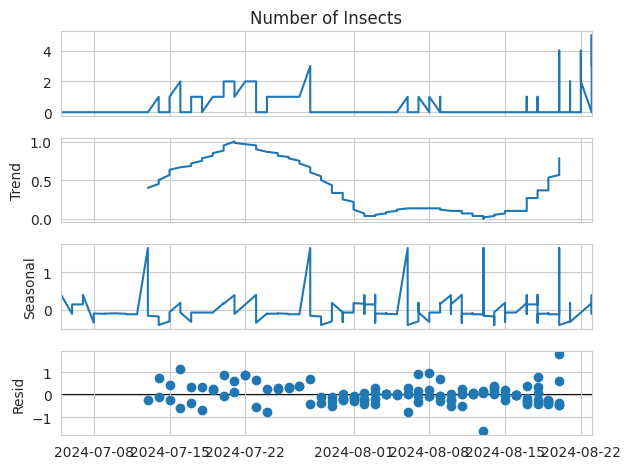

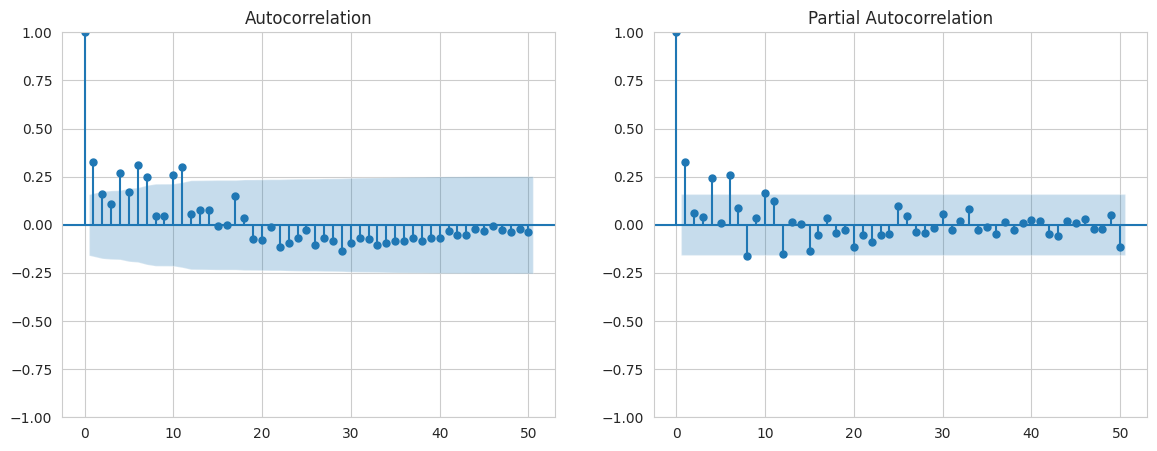

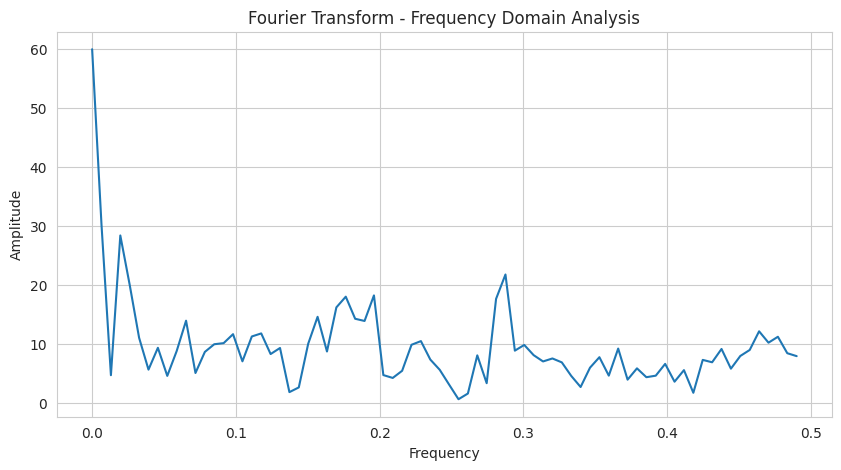

In [82]:
# Load dataset
TS_df = Final_Agritech_Pest_DS.copy()

# Convert Date column to datetime
TS_df["Date"] = pd.to_datetime(TS_df["Date"])  # Convert Date column to datetime
TS_df.set_index("Date", inplace=True)  # Set Date as index
TS_df = TS_df.sort_index()  # Ensure data is sorted by time

# Plot Time Series
plt.figure(figsize=(12, 5))
plt.plot(TS_df.index, TS_df["Number of Insects"], label="Number of Insects")
plt.xlabel("Date")
plt.ylabel("Insect Count")
plt.title("Time Series Plot of Insect Counts")
plt.legend()
plt.show()

print("\n")

# Seasonal Decomposition
decomposition = seasonal_decompose(TS_df["Number of Insects"], model='additive', period=30)  # Adjust period based on data
decomposition.plot()
plt.show()

print("\n")

# ACF and PACF Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(TS_df["Number of Insects"], ax=axes[0], lags=50)
plot_pacf(TS_df["Number of Insects"], ax=axes[1], lags=50)
plt.show()

print("\n")

# Fourier Transform (Spectral Analysis)
fft_vals = np.fft.fft(TS_df["Number of Insects"])
frequencies = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_vals[:len(frequencies)//2]))
plt.title("Fourier Transform - Frequency Domain Analysis")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

Augmented Dickey-Fuller Test:
ADF Statistic: -0.8081696639782773
p-value: 0.8167105034754409
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}
The time series is non-stationary.




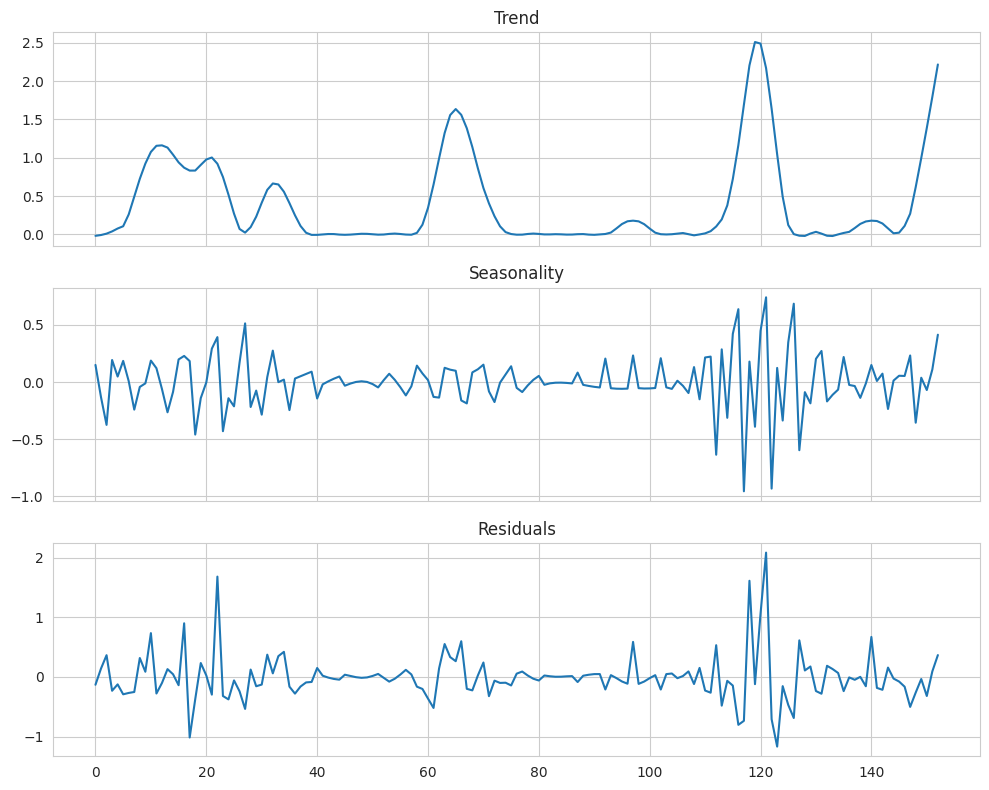

In [95]:
# Augmented Dickey-Fuller (ADF) Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

print("Augmented Dickey-Fuller Test:")
adf_test(TS_df["Number of Insects"])

print("\n")

# Seasonal-Trend Decomposition using LOESS (STL)
period = 5  # Adjust based on your time series frequency
stl = STL(df["Number of Insects"], period=period)
result = stl.fit()

# Plot STL decomposition
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
result.trend.plot(ax=axes[0], title="Trend")
result.seasonal.plot(ax=axes[1], title="Seasonality")
result.resid.plot(ax=axes[2], title="Residuals")
plt.tight_layout()
plt.show()

In [100]:
# Load dataset
Time_df = Final_Agritech_Pest_DS.copy()

# Convert Date column to datetime
Time_df["Date"] = pd.to_datetime(df["Date"])  # Convert Date to datetime
Time_df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour  # Convert Time to numeric (hour of the day)
Time_df["Year"] = Time_df["Date"].dt.year
Time_df["Month"] = Time_df["Date"].dt.month
Time_df["Day"] = Time_df["Date"].dt.day
Time_df["Weekday"] = Time_df["Date"].dt.weekday
Time_df["DayOfYear"] = Time_df["Date"].dt.dayofyear

# Drop original Date column
X = Time_df.drop(columns=["Number of Insects", "Date", "Location"])  # Drop target and non-numeric columns
y = Time_df["Number of Insects"]

In [105]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mae, mse, r2)
    print(f"{name} Results:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}\n")

Linear Regression Results:
MAE: 0.4098, MSE: 0.3703, R²: -0.0109

Ridge Regression Results:
MAE: 0.4078, MSE: 0.3609, R²: 0.0147

Lasso Regression Results:
MAE: 0.3277, MSE: 0.2689, R²: 0.2659

Random Forest Results:
MAE: 0.4374, MSE: 0.5049, R²: -0.3786

Gradient Boosting Results:
MAE: 0.4493, MSE: 0.6053, R²: -0.6527



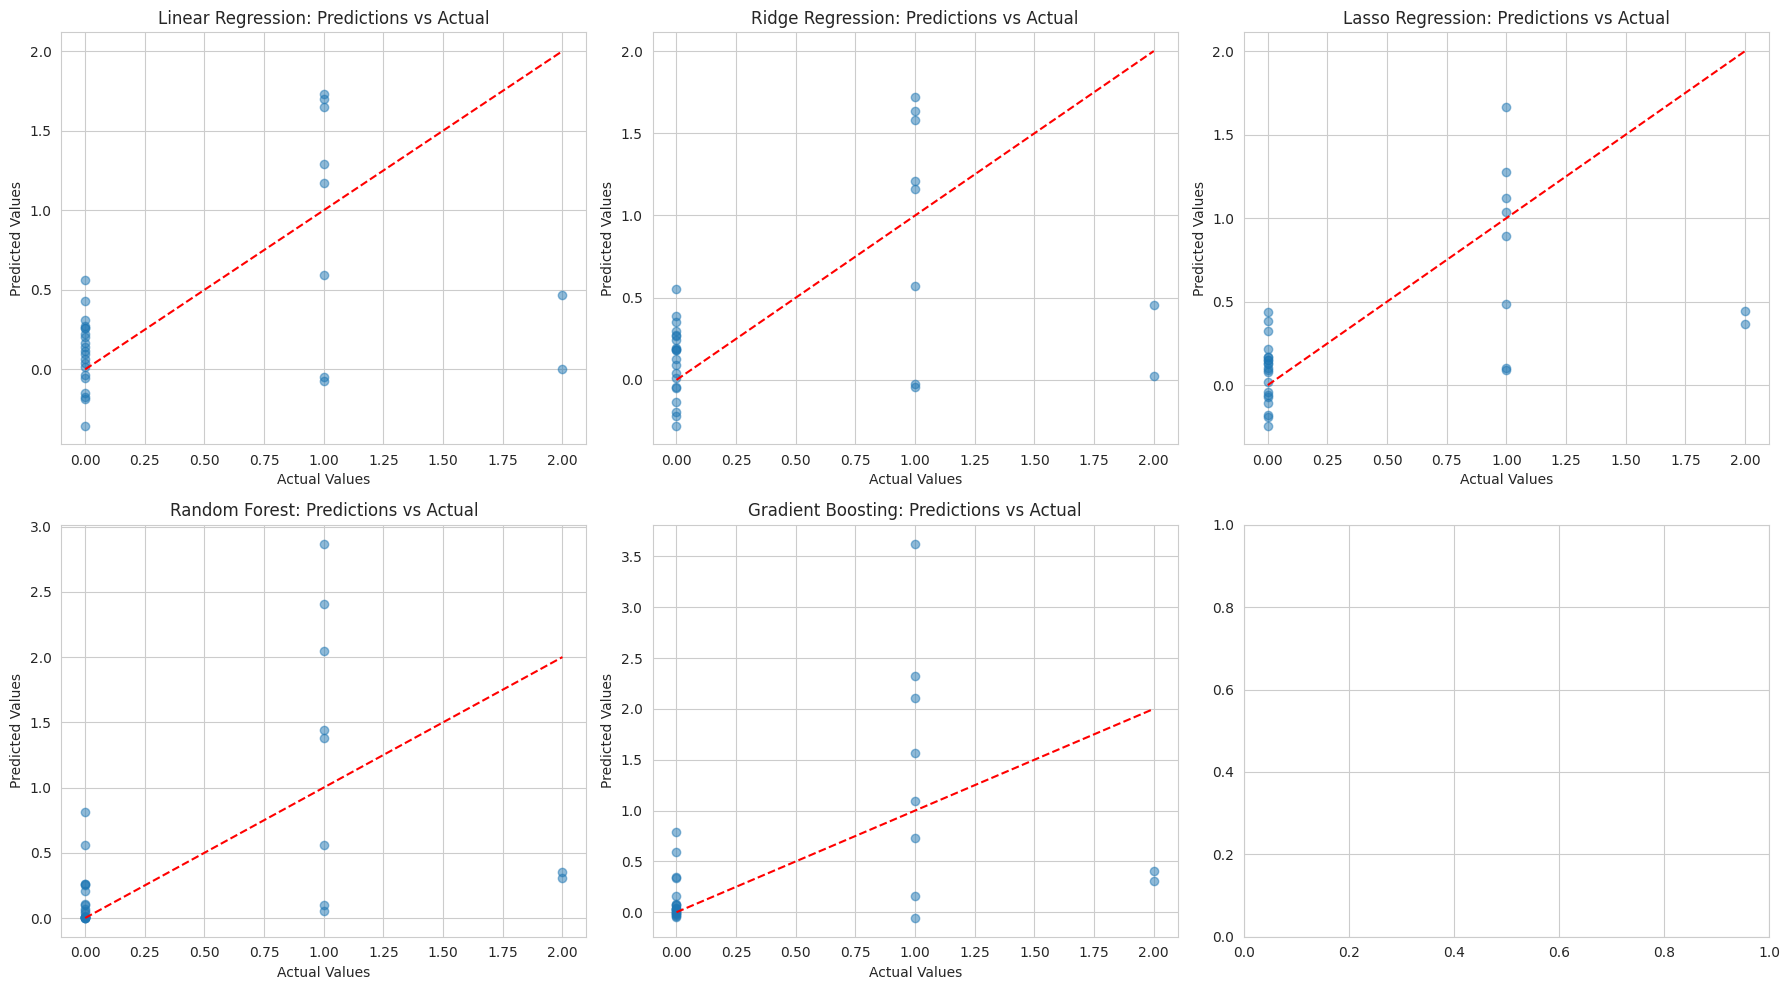

In [108]:
# Visualization of Predictions vs Actual
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    axes[i].set_title(f"{name}: Predictions vs Actual")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

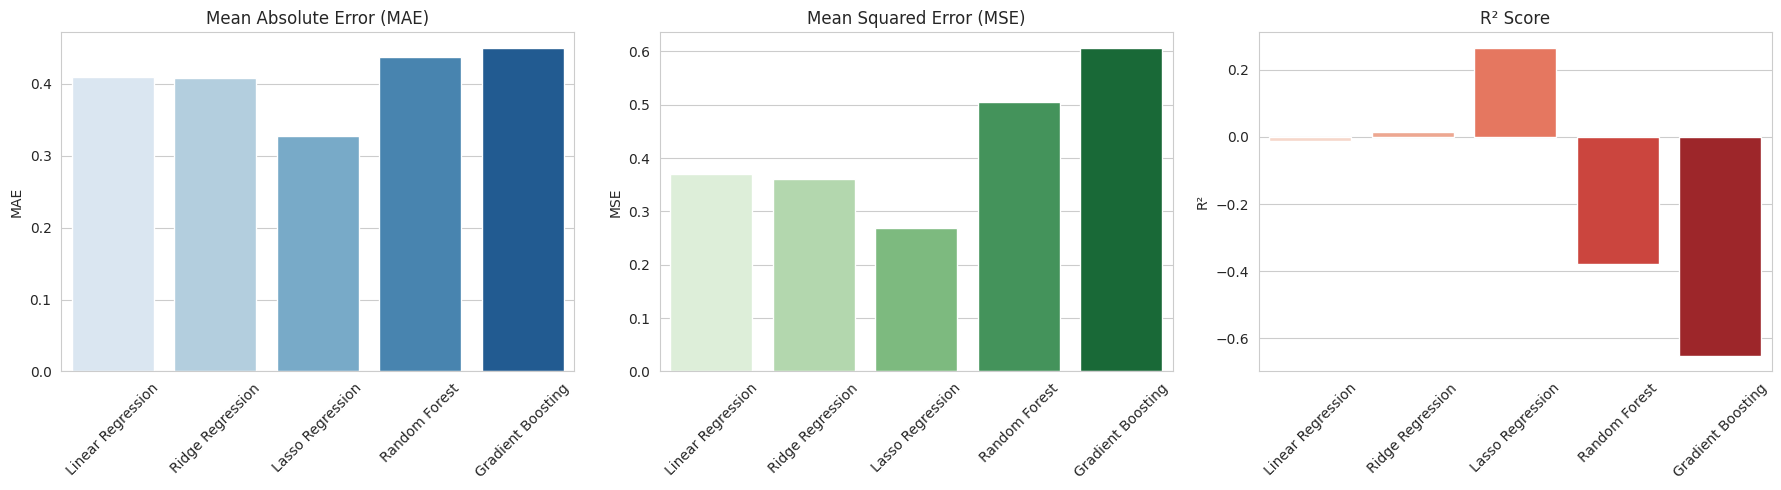

In [107]:
# Visualization of Model Performance
models_list = list(results.keys())
mae_values = [results[m][0] for m in models_list]
mse_values = [results[m][1] for m in models_list]
r2_values = [results[m][2] for m in models_list]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=models_list, y=mae_values, ax=axes[0], palette="Blues", legend=False, hue=models.keys())
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=mse_values, ax=axes[1], palette="Greens", legend=False, hue=models.keys())
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=r2_values, ax=axes[2], palette="Reds", legend=False, hue=models.keys())
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()